In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [5]:
from sympy import Matrix, Array
from sympy.abc import x, y, z
import torch
from torch.autograd.functional import jacobian
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#torch.set_printoptions(precision=10)
torch.set_default_dtype(torch.float64)

In [7]:
g = -10

In [25]:
def run_pendulum_energy(x,y, x_dot,y_dot, steps, stepsize):
    # using forward Euler for the pendulum

    i = 0
    lam = 0
    positions = []
    energies = []
    while i < steps:
        i +=1
        positions.append(np.array([x,y]))


        x_dot += (2*x*lam)*stepsize
        y_dot += (2*y*lam + g)*stepsize

        lam = (-x_dot**2 -y_dot**2 - g*y)/(2*(x**2 + y**2))

        x += x_dot*stepsize
        y += y_dot*stepsize

        energy = 10*(1-y) + 0.5 *(x_dot**2 + y_dot**2)
        energies.append(energy)
    return positions, energies

In [26]:
def run_pendulum(x,y, x_dot,y_dot, steps, stepsize):
    # using forward Euler for the pendulum

    i = 0
    positions = []
    energies = []
    while i < steps:
        i +=1
        positions.append(np.array([x,y]))

        x += x_dot*stepsize
        y += y_dot*stepsize
        x_dot += (2*x*lam)*stepsize
        y_dot += (2*y*lam + g)*stepsize
        lam = (-x_dot**2 -y_dot**2 - g*y)/(2*(x**2 + y**2))


        energy = 10*(1-y) + 1/2(x_dot**2 + y_dot**2)
    return positions

<>:18: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:18: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4256\1859427827.py:18: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  energy = 10*(1-y) + 1/2(x_dot**2 + y_dot**2)


In [27]:
def run_pendulum_symplectic(x,y, x_dot,y_dot, steps, stepsize):
    # using forward Euler for the pendulum

    i = 0
    positions = []
    while i < steps:
        i +=1
        positions.append(np.array([x,y]))

        x += x_dot*stepsize
        y += y_dot*stepsize

        lam = newton_raphson()

        x_dot += (2*x*lam)*stepsize
        y_dot += (2*y*lam + g)*stepsize
    return positions

In [28]:
def symplectic_2(x,y, x_dot,y_dot, steps, stepsize):
    positions = []
    i = 0
    while i < steps:
        i+=1
        positions.append(np.array([x,y]))

        ddp1 = x_dot + 2*x_dot*(1- 1/(x**2 +y**2))
        ddp2 = y_dot + 2*y_dot*(1- 1/(x**2 +y**2))

        x += ddp1*stepsize
        y += ddp2*stepsize

        ddq1 = -(2*(g*y -x_dot**2 -y_dot**2)*(x))/(x**2 + y**2)
        ddq2 = g -(g*(x**2+y**2) - 2*y*(g*y - x_dot**2 -y_dot**2))/(x**2+ y**2)

        x_dot += ddq1*stepsize
        y_dot +=ddq2*stepsize

        # lam = (-x_dot**2 -y_dot**2 + g*y)/(2*(x**2 + y**2))
        # x_dot += (2*x*lam)*stepsize
        # y_dot += (2*y*lam - g)*stepsize
    return positions

In [29]:
positions, energy = run_pendulum_energy(1,0,0,0,10000,0.1)
y = [position[1] for position in positions]
plt.plot(energy, color = 'red')
plt.plot(y)

OverflowError: (34, 'Result too large')

MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12388\3985875577.py:12: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  graph.set_data(x, y)


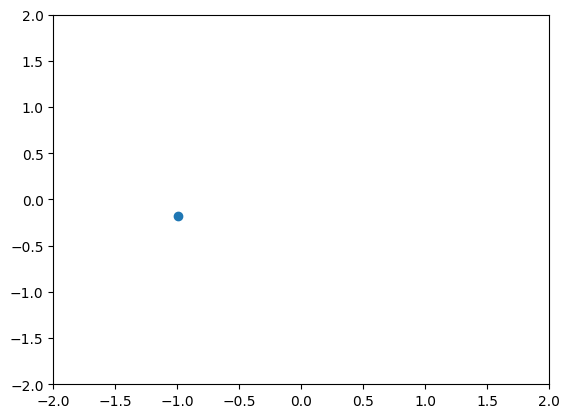

In [70]:
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
graph, = ax.plot([], [], 'o')

def init():
    graph.set_data([], [])
    return graph,

def animate(i):
    x = positions[i][0]
    y = positions[i][1]
    graph.set_data(x, y)
    return graph,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=1, blit=True)
anim.save('pendulum_symp.gif', writer='imagemagick')

In [10]:
t1 = torch.tensor([1.,-1.])
t2 = torch.tensor([0.1,0.1])
t1@ t2

tensor(0.)

In [11]:
def newton_raphson(q_old,p_old,lam_old,step):
    '''given q^n and p^n, works out the update p^(n+1)'''
    def fn(lam):
        t1 = torch.tensor([1.,1.])
        F = torch.tensor([0.,-10.])
        return t1 @ (q_old + step*p_old + 2*step**2*lam * q_old + step**2 *F)**2 - t1@ q_old**2

        #return p_i   -step*((10*(t1@q_i) - norm_p)/norm_q)*q_i   + step*torch.tensor([0,10]) -p
    x= lam_old
    iters =0
    # what's the correct size of initial guess?
    while iters <40:
        # print(f"fn = {fn(x)}")
        # print(f"x = {x}")
        # print(f"Jacobian: {jacobian(fn, x)}")
        #x += torch.linalg.solve(jacobian(fn, x), -fn(x))
        x -= fn(x)/jacobian(fn, x)
        iters +=1
    #print(f"Error= {fn(x)}", fn(x))
    return x

In [12]:
from scipy.optimize import check_grad

In [13]:
q_i = torch.tensor([1.,-0.5])
p_i = torch.tensor([0.,0.])
x = torch.tensor([1.,1.])
step = 0.1
def fn(p):
    t1 = torch.tensor([0.,1.])
    norm_q = torch.tensor([1.,1.]) @ (q_i**2)
    norm_p = torch.tensor([1.,1.]) @ (p**2)
    #return p_i   -step*((10*(t1@q_i) - norm_p)/norm_q)*q_i   + step*torch.tensor([0,10]) -p
    return norm_p

In [14]:
newton_raphson(torch.tensor([1.,0]),torch.tensor([0.,0.]),torch.tensor([0.]),.1)

tensor([-0.2506])

In [15]:
def symplectic_vectorized(q_init,p_init, lam, steps, stepsize):
    positions = []
    i = 0
    q = q_init
    p= p_init
    while i < steps:
        i+=1
        F = torch.tensor([0.,-10.])
        lamb = newton_raphson(q,p,lam,stepsize)
        #print(f"Lam  = {lamb}")

        #print("should be", (q + stepsize*p + 2*step**2 *q*lamb + step**2 *F)**2,  torch.tensor([1.,1.])@(q + stepsize*p + 2*step**2 *q*lamb + step**2 *F)**2)
        p += (2*q*lamb + F)*stepsize
        q += stepsize*p
        pos= q.numpy().copy()
        positions.append(pos)
        #print("q =",q, torch.tensor([1.,1.])@q**2)

        # lam = (-x_dot**2 -y_dot**2 + g*y)/(2*(x**2 + y**2))
        # x_dot += (2*x*lam)*stepsize
        # y_dot += (2*y*lam - g)*stepsize
    return positions

In [16]:
positions = symplectic_vectorized(torch.tensor([1.,0]),torch.tensor([0.,0.]), torch.tensor([0.]),1000,0.1)

In [17]:
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
graph, = ax.plot([], [], 'o')

def init():
    graph.set_data([], [])
    return graph,

def animate(i):
    x = positions[i][0]
    y = positions[i][1]
    graph.set_data(x, y)
    return graph,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=1, blit=True)
anim.save('pendulum_symp.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5924\3985875577.py:12: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  graph.set_data(x, y)

KeyboardInterrupt



Error in callback <function flush_figures at 0x0000020CA23B5E10> (for post_execute):



KeyboardInterrupt



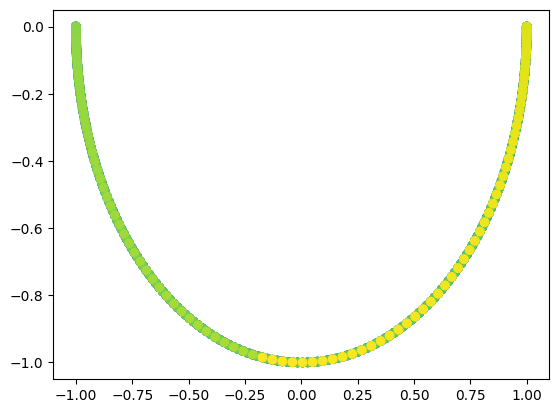

In [112]:
xs = [ tensor[0] for tensor in positions]
ys = [ tensor[1] for tensor in positions]
color =np.linspace(-1, 1, len(xs))
plt.scatter(xs,ys, c = color)

In [19]:
def non_symplectic_vectorized(q_init,p_init, lam, steps, stepsize):
    positions = []
    i = 0
    q = q_init
    p= p_init
    while i < steps:
        i+=1
        F = torch.tensor([0.,-10.])
        lamb = newton_raphson(q,p,lam,stepsize)
        #print(f"Lam  = {lamb}")

        #print("should be", (q + stepsize*p + 2*step**2 *q*lamb + step**2 *F)**2,  torch.tensor([1.,1.])@(q + stepsize*p + 2*step**2 *q*lamb + step**2 *F)**2)
        q += stepsize*p
        p += (2*q*lamb + F)*stepsize

        pos= q.numpy().copy()
        positions.append(pos)
        #print("q =",q, torch.tensor([1.,1.])@q**2)

        # lam = (-x_dot**2 -y_dot**2 + g*y)/(2*(x**2 + y**2))
        # x_dot += (2*x*lam)*stepsize
        # y_dot += (2*y*lam - g)*stepsize
    return positions

In [90]:
positions_non_symp = run_pendulum(1,0,0,0,1000,0.01)

In [102]:
positions = symplectic_vectorized(torch.tensor([1.,0]),torch.tensor([0.,0.]), torch.tensor([0.]),1000,0.01)

In [30]:
xs_1 = [tensor[0] for tensor in positions]
ys_1 = [tensor[1] for tensor in positions]
from matplotlib.collections import LineCollection
import matplotlib.colors as colors

red2 = colors.Colormap('Greens_r')
points_1 = np.vstack((xs_1, ys_1)).T.reshape(-1, 1, 2)
segments_1 = np.hstack((points_1[:-1], points_1[1:]))
alphas_1 = np.flip(np.linspace(1,len(xs), len(xs)))

NameError: name 'positions' is not defined

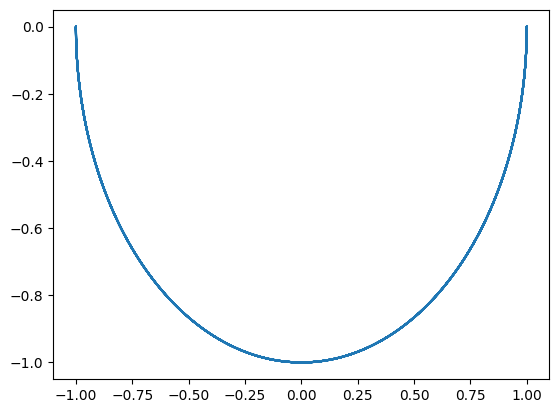

In [116]:
plt.plot(xs_1,ys_1)

In [104]:
xs_2 = [ tensor[0] for tensor in positions_non_symp]
ys_2 = [ -tensor[1] for tensor in positions_non_symp]
redfade = colors.to_rgb("red") + (0.0,)
myred = colors.LinearSegmentedColormap.from_list('my',[redfade, "red"])
points_2 = np.vstack((xs_2, ys_2)).T.reshape(-1, 1, 2)
segments_2 = np.hstack((points_2[:-1], points_2[1:]))
alphas_2 = np.flip(np.linspace(1,len(xs), len(xs)))

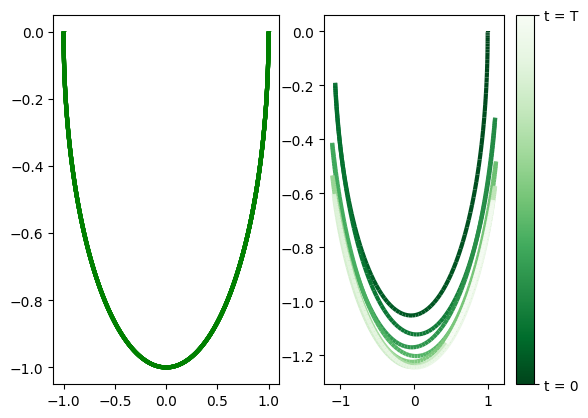

In [122]:
fig, axs = plt.subplots(1,2)

# plotting number 1
lc1 = LineCollection(segments_1, array=alphas_1,color = 'Green', lw=3)
line1 = axs[0].add_collection(lc1)
axs[0].autoscale()


lc2 = LineCollection(segments_2, array=alphas_2, cmap="Greens", lw=3)
line2 = axs[1].add_collection(lc2)
cbar = fig.colorbar(line2, ticks=[1, 1000])
cbar.ax.set_yticklabels(['t = T', 't = 0'])
cbar.ax.invert_yaxis()
axs[1].autoscale()

#plt.show()


#lc2= LineCollection(segments, array=alphas, cmap="Greens", lw=3)
#line2 = axs[1].add_collection(lc2)
#ax.autoscale()
plt.savefig('plot.pdf')

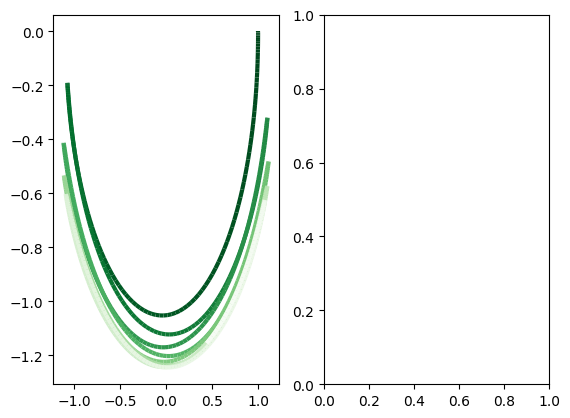

In [111]:
fig, axs = plt.subplots(1,2)

#plotting number 1
lc1 = LineCollection(segments, array=alphas, cmap="Greens", lw=3)
line1 = axs[0].add_collection(lc1)
axs[0].autoscale()


# lc2 = LineCollection(segments_2, array=alphas_2, cmap="Greens", lw=3)
# line2 = axs[1].add_collection(lc2)
# cbar = fig.colorbar(line2, ticks=[1, 1000])
# cbar.ax.set_yticklabels(['t = T', 't = 0'])
# cbar.ax.invert_yaxis()
# axs[1].autoscale()

plt.show()


#lc2= LineCollection(segments, array=alphas, cmap="Greens", lw=3)
#line2 = axs[1].add_collection(lc2)
#ax.autoscale()
#plt.savefig('plot.pdf')

In [53]:
print(lc1)

In [ ]:
positions = run_pendulum(1,-.8,0,0,1000,0.01)
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
graph, = ax.plot([], [], 'o')

def init():
    graph.set_data([], [])
    return graph,

def animate(i):
    x = positions[i][0]
    y = -positions[i][1]
    graph.set_data(x, y)
    return graph,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=1, blit=True)
anim.save('pendulum.gif', writer='imagemagick')

In [ ]:
# vector-valued function from a list of functions
def vectorize(g, ls):
    out =
    for i in range(len(ls)):
        ls[0]

In [ ]:
def G(gs):
    '''
    For each element g of gs,
    :param gs:
    :return:
    '''


In [14]:
y = torch.tensor(np.array([0,0,0]))

In [15]:
def G(gs):
    '''
    :param gs: a list of tensor functions
    :return: a function sending a tensor to the stacked matrix of the functions of that tensor
    '''
    def G_gs(tensor):
        # print("Function input: ",tensor) # checking the input for debugging
        # print("Function output:" , torch.stack([g(tensor) for g in gs],0))
        return torch.stack([g(tensor) for g in gs],0)

    return G_gs

In [16]:
def J(gs,x):
    return jacobian(G(gs),x)

In [17]:
def newton_raphson(g,init):
    x = init
    iters = 0
    print("Newton Raphson")

    # what's the correct size of initial guess?
    while iters < 10:
        print("init",x)
        G = g(torch.squeeze(x))
        print("G",G)
        P = torch.linalg.pinv(jacobian(g, x))
        print("P",P)
        x -= P@G
        print("X", x)
        iters +=1
    return x

In [18]:
def lam_rep(g,q1,Dg):
    def g_l(x):
        print("x = ",x)
        print("dG = ", Dg)
        print(" Q= ", q1)
        print(f"Q - x *dG = ",q1 - x*Dg)
        print(f"x @dG = ", x.reshape(-1,1) @Dg) # note - how do I do exactly what I want to
        return g(q1 - x* Dg)
    return g_l

In [19]:
def solve(gs, q1):
    print("Solve")
    Dg = J(gs, q1)
    print(f"Dg= {Dg}")
    g = G(gs)

    g_l= lam_rep(g,q1,Dg)
    init = torch.zeros_like(q1)

    r = newton_raphson(g_l, init)
    return r

In [20]:
#torch.set_printoptions(precision=10)
torch.set_default_dtype(torch.float64)

In [33]:
def shake_step(x, v1 , h, M, gs, e):
    '''
    Defining a function to take a step in the position, velocity form.
    g should be a vector-valued function of constraints.
    :return: x_1, v_1
    '''

    #print(f"x = {x}, v1 = {v1}")
    G1 = G(gs)

    DV = np.zeros_like(x)
    DV[-1] = 10 # gravity acts in the last dimension - only true for rollercoasters etc
    DV_col = DV.reshape(-1,1)

    x_col = x.reshape(-1,1)
    v1_col = v1.reshape(-1,1)


    x2 = x_col + h* v1_col - h**2 * torch.inverse(M) @ DV_col
    #print(f"x = {x_col}, v = {v1},hv = {h*v1_col}, last = {h**2 * torch.inverse(M) @ DV_col}, x2 = {x2}")

    Q_col = x2
    Q = torch.squeeze(Q_col)
    Dg_Q = J(gs, Q)
    Dg_q = J(gs, x)
    t = Dg_q[0, :].reshape(-1,1)

    # computing the offset
    #dL = torch.zeros_like(x) # we dont perform matrix operations with it so we don't need to transpose.
    # print(torch.tensor([g(Q) > e for g in gs]))
    # print(h**2 *torch.inverse(M) @ DV_col )
    # print(Q_col)
    # print(x_col + h* v1_col - h**2 * torch.inverse(M) @ DV_col)
    #print("ABS", torch.all(torch.abs(G1(Q))> e))

    while torch.all( torch.abs(G1(Q)) > e):

        for i in range(len(gs)):
            #print(i)
            t = Dg_q[i, :].reshape(-1,1)
            #print(f"{Q}")

            Dg_Q = J(gs, Q)
            # print("Dg_Q", Dg_Q.reshape(-1,1))
            # print("Dg_q",Dg_q)
            dL= gs[i](Q)/ (Dg_Q[i, :] @ torch.inverse(M) @ Dg_q[i, :].reshape(-1,1))
            edit =  (torch.inverse(M) @ Dg_q[i, :].reshape(-1,1)) * dL
            # print(f"factor = {dL}, i = {i}")
            # print(f"Edit {(torch.inverse(M) @ Dg_q[i, :].reshape(-1,1) * dL)}")
            # print(f"Q_col - edit {Q_col - 1*edit}")
            Q = torch.squeeze(Q_col - (torch.inverse(M) @ Dg_q[i, :].reshape(-1,1) * dL))
            Q_col = Q.reshape(-1,1)
            #print(f"Reshaped: { Dg_q[i, :].reshape(-1,1)}")
            #print(f"Reshaped and multiplied: { torch.inverse(M) @ Dg_q[i, :].reshape(-1,1)}")
    #print(f"Q={Q}, error={torch.abs(G1(Q))}")
    v2 = (Q_col-x_col)/h
    # print("Returning")
    return Q, v2

In [34]:
    # l = solve(gs,x)
    # v2 = v1 + M**-1 *( h * DV - h * G * torch.transpose(J(gs,x),1,0)@l)
    # x += h*v2
    #
    # # and then just when I'm recording the positions I need to work out v^n
    # v = (v1 + v2)/2

In [35]:
def shake_simulator(x_init, v_init, h, M, gs, its):
    xs = [x_init]
    x = x_init
    v1 = v_init
    for i in range(its):
        x,v1 = shake_step(x, v1 , h, M, gs, 10**(-8))
        xs.append(x)
    return xs

In [41]:
x_init = torch.tensor([1.,0.]) # a point which is on the curve
v_init = torch.tensor([0.,0.]) # starting with velocity zero
h = 2**(-5)
gs = [lambda x: x[0]**2 -1 +x[1]**2]
M = torch.eye(2)
its = 1000
#x = shake_step(x_init, v_init , h, M, gs, 10**(-4))
positions = shake_simulator(x_init, v_init, h, M, gs, 100000)

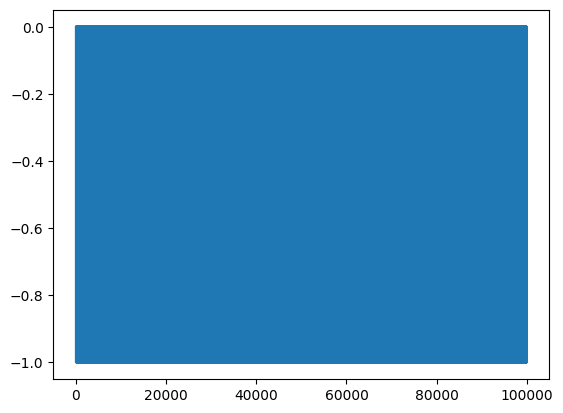

In [42]:
positions1 = positions
y = [pos[1] for pos in positions]
plt.plot(y)

MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22976\3263819736.py:14: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  graph.set_data(x, y)


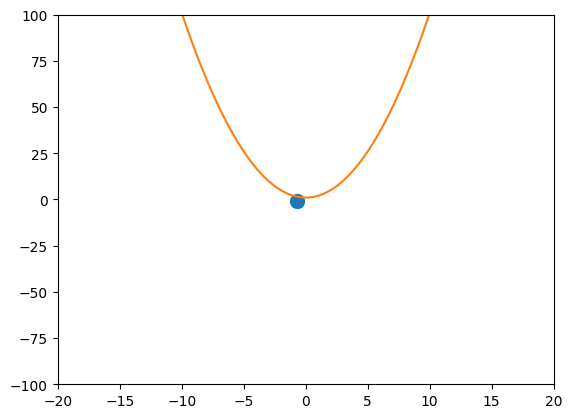

In [39]:
fig = plt.figure()
ax = plt.axes(xlim=(-20, 20), ylim=(-100, 100))
graph, = ax.plot([], [], 'o', markersize = 10)

x = np.linspace(-10,10,50)
line, = ax.plot(x,x**2+1)
def init():
    graph.set_data([], [])
    return graph,

def animate(i):
    x = positions1[i][0]
    y = positions1[i][1]
    graph.set_data(x, y)
    return graph,line


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=1, blit=True)
anim.save('rollercoaster_pendulum.gif', writer='imagemagick')

In [ ]:
torch.tensor([1,1]).size()

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
graph, = ax.plot([], [], 'o')

def init():
    graph.set_data([], [])
    return graph,

def animate(i):
    x = positions[i][0]
    y = positions[i][1]
    graph.set_data(x, y)
    return graph,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=1, blit=True)
anim.save('rollercoaster.gif', writer='imagemagick')